In [5]:
%load_ext autoreload
%autoreload 2
import builtins
from IPython.lib import deepreload
builtins.reload = deepreload.reload
import itertools
import os
import helpers
from helpers import read_df_from_dir, filter_by
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
#print(mpl.style.available)
mpl.style.use("bmh")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
path="../logs/scaling/"

In [7]:
df = read_df_from_dir(path)
df.sort_values(by=["nb_gpus"],inplace=True)
#df

In [8]:
#df_plot=df_filtered.groupby([key],as_index=False).mean()
#filters={"problem":"conv2d_2"}
#key_secondary="framework"

#df = filter_by(df,filters)
#df=df_filtered.groupby([key,"framework"],as_index=False).mean()
#df

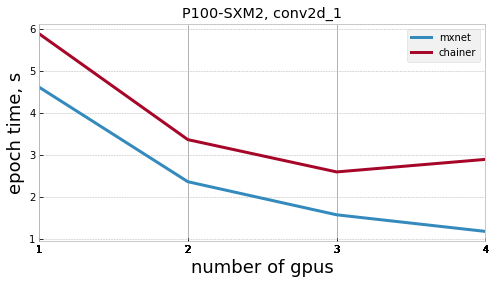

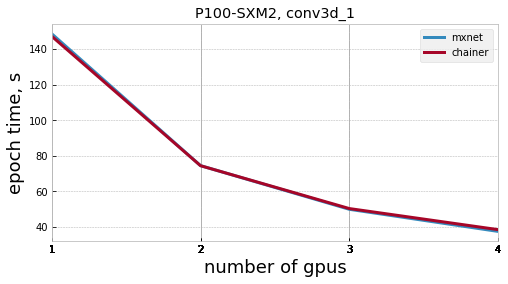

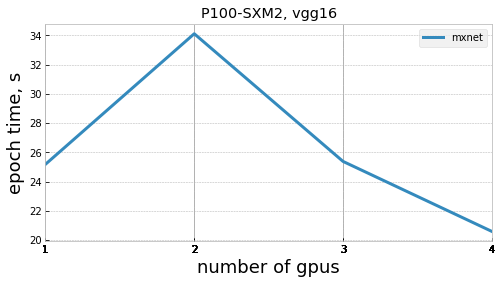

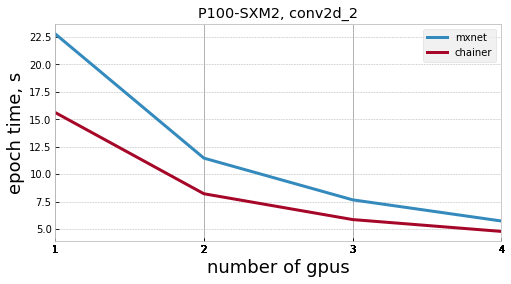

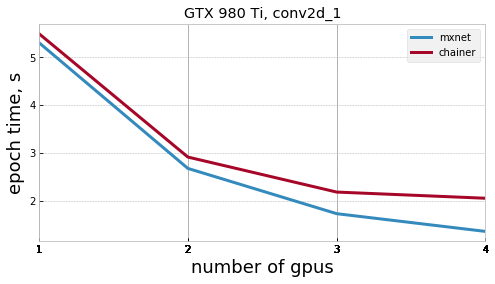

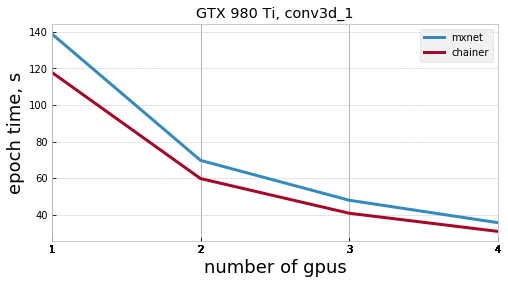

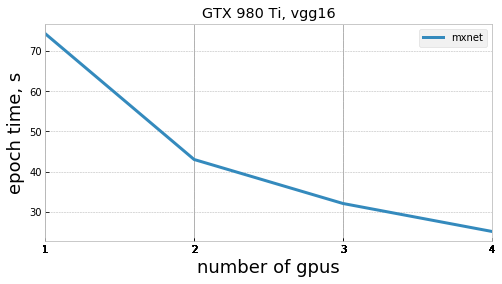

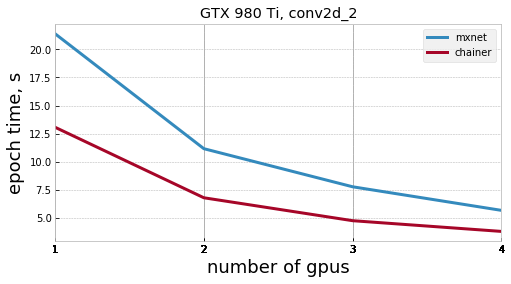

In [9]:
mpl.rcParams["figure.figsize"] = 8,4
key="nb_gpus"

keys_third_order = ["device","problem"]
uniques = [df[key].unique() for key in keys_third_order]
uniques_all = itertools.product(*uniques)
filters_all = [dict(zip(keys_third_order, values)) for values in uniques_all]

for filters in filters_all:
    

#for problem in df["problem"].unique():
    df_pre = filter_by(df,filters)
    if df_pre.shape[0]==0:
        continue
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,facecolor='white')

    for framework in df["framework"].unique():
        filters2={}
        filters2["framework"]=framework
 #       filters={"framework":framework,"problem":problem}
  #      filters={"framework":framework,"problem":problem}
        #print(filters)
        df_filtered = filter_by(df_pre,filters2)
        df_plot = df_filtered.groupby([key],as_index=False).mean()
        yerror = df_filtered.groupby([key],as_index=False)["time"].std().fillna(0)
        if df_plot.shape[0] > 0:
            df_plot.plot(x="nb_gpus",y="time", yerr = yerror, ax=ax, label=framework, linewidth=3)
            #plt.errorbar(x, y, xerr=0.2, yerr=0.4)
    ax.set_xlabel("number of gpus",size=18)
    ax.set_ylabel("epoch time, s",size=18)
    ax.set_xticks(df["nb_gpus"])
    title = ", ".join(filters.values())
    plt.title(title)
    plt.savefig(os.path.join("./plots/scaling",title+".svg"),bbox_inches="tight",transparent=True)
    plt.show()
    
None


#for problem in df["problem"].unique():
    #render(key="framework",filters={"device":"E5-2699","problem":problem},color="dodgerblue")
 #   render(key="framework",filters={"device":"P100-PCIE","problem":problem},color="yellowgreen")
